## 텍스트 감성 분석 (Sentimental Analysis)
: 텍스트에 나타나는 주관적 요소인 긍정적 감정과 부정적 감정을 판별해 이를 수치나 도식, 등급 등으로 정량화하는 작업. 단순히 긍정/부정을 판별하는 것 뿐 아닌 대상이 되는 개체나 속성을 추출하고, 감성을 표현하는 이들의 감정, 감성, 태도, 입장 등을 분석함
- 아무래도 SNS와 같은 소셜네트워크 서비스의 활성화로 인해 관심이 높아진 추세이다.

#### 🔮How?
- '데이터 수집'
- 수집된 정보에서 텍스트 작성자의 주관이 드러나는 부분만을 걸러내는 '주관성 탐지' 과정
- '주관성의 극성'이나 '정도'를 측정하고 분류하는 과정



## 1-1. 텍스트를 숫자로 표현하는 방법
- A=0, ... , Z=25일 때 A와 Z는 25만큼 먼 것인가? No.
- 텍스트 그 자체는 기호일 뿐이다.

#### ✔️단어의 의미를 나타내는 벡터를 짝지어보자.
ex) <br/>
i feel hungry <br/>
i eat lunch <br/>
now i feel happy

In [1]:
# 처리해야 할 문장을 파이썬 리스트에 옮겨 담아 보기
sentences = ['i feel hungry', 'i eat lunch', 'now i feel happy']

# 파이썬 split() 메소드 이용해 단어 단위로 문장 쪼개보기
word_list = 'i feel hungry'.split()
print(word_list)

['i', 'feel', 'hungry']


텍스트 데이터로부터 사전 만들기 위해 모든 문장을 단어 단위로 쪼갠 후 파이썬 dic 자료구조로 표현해보기

In [2]:
index_to_word = {} # 빈 딕셔너리

# 단어 하나하나 채워보기. 순서는 임의로 함. 중요 x
# <BOS>, <PAD>, <UNK>는 관례적으로 딕셔너리 맨 앞에 넣어주기
index_to_word[0]='<PAD>'  # 패딩용 단어
index_to_word[1]='<BOS>'  # 문장의 시작지점
index_to_word[2]='<UNK>'  # 사전에 없는(Unknown) 단어
index_to_word[3]='i'
index_to_word[4]='feel'
index_to_word[5]='hungry'
index_to_word[6]='eat'
index_to_word[7]='lunch'
index_to_word[8]='now'
index_to_word[9]='happy'

print(index_to_word)

{0: '<PAD>', 1: '<BOS>', 2: '<UNK>', 3: 'i', 4: 'feel', 5: 'hungry', 6: 'eat', 7: 'lunch', 8: 'now', 9: 'happy'}


10개짜리 작은 딕셔너리가 만들어짐. <br/>
우리가 가진 이 텍스트 데이터를숫자로 바꿔보기. {텍스트: 인덱스} 구조

In [3]:
word_to_index = {word:index for index, word in index_to_word.items()}
print(word_to_index)

{'<PAD>': 0, '<BOS>': 1, '<UNK>': 2, 'i': 3, 'feel': 4, 'hungry': 5, 'eat': 6, 'lunch': 7, 'now': 8, 'happy': 9}


이제 단어를 주면 그 단어의 인덱스 반환하는 방식으로 사용 가능

In [4]:
print(word_to_index['feel'])

4


우리가 가진 텍스트 데이터를 숫자로 바꿔주기

In [5]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트로 변환해주는 함수
# 단, 모든 문장은 <BOS>로 시작하는 것으로 하기
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']] + [word_to_index[word] if word in word_to_index
                                       else word_to_index['<UNK>']
                                       for word in sentence.split()]

print(get_encoded_sentence('i eat lunch', word_to_index))


[1, 3, 6, 7]


-> 맨 앞에는 < BOS >의 인덱스 <br/>
-> word는 sentence를 단어 단위로 쪼갠 것인데 이 word가 word_index 안에 있다면 그 word의 해당 index, 없으면 < UNK >의 인덱스 반환하기
- < BOS >: 1
- i: 3
- eat: 6
- lunch: 7

In [6]:
# 여러 개의 문장 리스트를 한 꺼번에 숫자 텐서로 encode해주는 함수
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# sentences=['i feel hungry', 'i eat lunch', 'now i feel happy'] 가 아래와 같이 변환됩니다. 
encoded_sentences = get_encoded_sentences(sentences, word_to_index)
print(encoded_sentences)


[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]]


In [7]:
# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' 
                    for index in encoded_sentence[1:]) #[1:]를 통해 <BOS>를 제외

print(get_decoded_sentence([1, 3, 4, 5], index_to_word))


i feel hungry


In [8]:
# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode해주는 함수
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

# encoded_sentences=[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]] 가 아래와 같이 변환됩니다.
print(get_decoded_sentences(encoded_sentences, index_to_word))

['i feel hungry', 'i eat lunch', 'now i feel happy']


## 1-2. Embedding 레이어의 등장
- 'i feel hungry'가 1, 3, 4, 5로 변환되었지만 이는 텍스트에 담긴 언어 의미와 대응되는 것이 아니라 임의로 부여된 단어의 순서에 불과하다.
- 우린 단어와 그 단어의 의미를 나타내는 벡터를 짝지으려 함
- So, 단어 의미를 나타내는 벡터를 훈련 가능한 파라미터로 놓고, 이를 딥러닝을 통해 학습해서 최적화하자

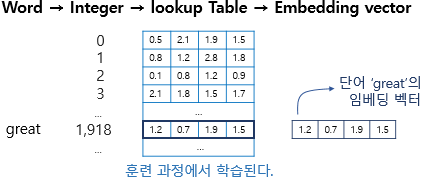
[임베딩 레이어를 통해 word가 벡터화되는 과정]
https://wikidocs.net/64779

- 위 예제에서 'great'라는 문자의 index는 1918이다.
- 'great'라는 단어의 의미 공간상의 워드벡터(word vector)는 Lookup Table 형태로 구성된 Embedding 레이어의 1919번째 벡터가 된다.
- 단어 'great'의 임베딩 벡터: (1.2, 0.7, 1.9, 1.5)

In [11]:
# 아래 코드는 에러 발생함
import numpy as np
import tensorflow as tf
import os

vocab_size = len(word_to_index) # 위 예시에서 딕셔너리에 포함된 단어 개수는 10개
word_vector_dim = 4 # 위 그림과 같이 4차원의 워드 벡터 가정

embedding = tf.keras.layers.Embedding(input_dim=vocab_size,
                                      output_dim=word_vector_dim,
                                      mask_zero=True)

# 숫자로 변환된 텍스트 데이터 [[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]] 에 Embedding 레이어를 적용합니다. 
raw_inputs = np.array(get_encoded_sentences(sentences, word_to_index), dtype='object')
output = embedding(raw_inputs)
print(output)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

#### 🔥Why Error?
- Embedding 레이어의 input이 되는 문장 벡터는 **길이가 일정**해야 함
- 하지만 우리의 raw_inputs 3개 벡터의 길이는 각각 4, 4, 5
- 문자 벡터 뒤에 < PAD >를 추가해 길이 일정하게 맞춰주자

In [12]:
raw_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                           value=word_to_index['<PAD>'], 
                                                           padding='post',
                                                           maxlen=5)
print(raw_inputs)

[[1 3 4 5 0]
 [1 3 6 7 0]
 [1 8 3 4 9]]


이를 이용해 다시 시도해보기

In [13]:
vocab_size = len(word_to_index) # 위 예시에서 딕셔너리에 포함된 단어 개수는 10개
word_vector_dim = 4 # 위 그림과 같이 4차원의 워드 벡터 가정

embedding = tf.keras.layers.Embedding(input_dim=vocab_size,
                                      output_dim=word_vector_dim,
                                      mask_zero=True)

# tf.keras.preprocessing.sequence.pad_sequences를 통해 word vector를 모두 일정 길이로 맞춰주어야 
# embedding 레이어의 input이 될 수 있음에 주의해 주세요. 
raw_inputs = np.array(get_encoded_sentences(sentences, word_to_index), dtype='object')
raw_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                           value=word_to_index['<PAD>'], 
                                                           padding='post',
                                                           maxlen=5)
output = embedding(raw_inputs)
print(output)

tf.Tensor(
[[[-0.03214248 -0.04455632 -0.01980099  0.03708606]
  [ 0.03848163 -0.03700342 -0.00271749 -0.01730233]
  [-0.04339704  0.02589181 -0.02622956 -0.03513915]
  [-0.0485155  -0.01949711 -0.0127705  -0.0016017 ]
  [-0.0087096   0.01812693 -0.0336083   0.0054865 ]]

 [[-0.03214248 -0.04455632 -0.01980099  0.03708606]
  [ 0.03848163 -0.03700342 -0.00271749 -0.01730233]
  [-0.00132138 -0.0489406  -0.03184764  0.02364948]
  [ 0.02568266  0.00872542  0.02319995  0.00484497]
  [-0.0087096   0.01812693 -0.0336083   0.0054865 ]]

 [[-0.03214248 -0.04455632 -0.01980099  0.03708606]
  [ 0.03567246 -0.03589872  0.00933532 -0.01909781]
  [ 0.03848163 -0.03700342 -0.00271749 -0.01730233]
  [-0.04339704  0.02589181 -0.02622956 -0.03513915]
  [-0.00796846  0.01627031  0.0280788  -0.03986689]]], shape=(3, 5, 4), dtype=float32)


## 2. 시퀀스 데이터를 다루는 RNN
- RNN은 시퀀스(Sequence) 형태의 데이터를 처리하기에 최적인 모델로 알려져 있음 <br/>

We don't understand one word only, we understand based on the **previous words + this word.**

#### RNN을 사용해 이전 스텝의 텍스트 데이터 처리하는 예제 코드 구현해보기

In [14]:
vocab_size = 10 # 어휘 사전의 크기 (10개의 단어)
word_vector_dim = 4 # 단어 하나를 표현하는 임베딩 벡터의 차원 수

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(8)) # 가장 널리 쓰이는 LSTM레이어 (이 때 LSTM state 벡터의 차원수는 8로 함 - 변경 가능)
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # 최종 출력은 긍정/부정을 나타내는 1차원

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 416       
_________________________________________________________________
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 537
Trainable params: 537
Non-trainable params: 0
_________________________________________________________________


## 3. 꼭 RNN이어야 할까?
- 텍스트를 처리하기 위해 RNN이 아니라 1-D Convolution Neural Network (1-D CNN)을 사용할 수도 있다.
- 우리는 이전 이미지 분류기를 구현하며 2-D CNN을 이미 사용한 적 있음
    - 이미지는 시퀀스 데이터가 아니라, 이미지 분류기 모델에서는 이미지 전체가 한꺼번에 입력으로 사용됨
- 1-D CNN은 문장 전체를 한꺼번에 한 방향으로 길이 7짜리 필터로 스캐닝하며 7단어 이내에서 발견되는 특징을 추출하여 그것으로 문장을 분류하는 방식으로 사용됨
- CNN은 RNN보다 병렬처리가 효율적이라 학습 속도도 훨씬 빠르게 진행된다.

#### ✔️1-D CNN

In [15]:
vocab_size = 10 # 어휘 사전의 크기 (10개의 단어)
word_vector_dim = 4 # 단어 하나를 표현하는 임베딩 벡터의 차원 수

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1차원

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
conv1d (Conv1D)              (None, None, 16)          464       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 16)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 16)          1808      
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

#### ✔️GlobalMaxPooling1D
: 전체 문장 중에서 단 하나의 가장 중요한 단어만 피처로 추출하여 그것으로 문장의 긍정/부정을 평가하는 방식
- 의외로 성능이 잘 나올 수 있음

In [16]:
vocab_size = 10 # 어휘 사전의 크기 (10개의 단어)
word_vector_dim = 4 # 단어 하나를 표현하는 임베딩 벡터의 차원 수

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1차원

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 4)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


이 외에도 1-D CNN과 RNN을 섞어 쓰거나, FFN(FeedForward Network) 레이어만으로 구성하거나, Transformer 레이어를 쓰는 등 매우 다양한 시도를 해볼 수 있음

## 3. IMDB 영화리뷰 감성분석
## 3-1. IMDB 데이터셋 분석
- IMDb Large Movei Dataset: 50000개의 영어로 작성된 영화 리뷰 텍스트
- 긍정은 1, 부정은 0의 라벨이 달려 있음
- 50000개의 리뷰 중 절반은 훈련용, 나머지 절반은 테스트용 데이터로 사용하도록 지정됨
- tensorflow Keras 데이터셋 안에 포함되어 있어 손쉽게 사용 가능

In [17]:
imdb = tf.keras.datasets.imdb

# IMDb 데이터셋 다운로드
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
print('훈련 샘플 개수: {}, 테스트 개수: {}'.format(len(x_train), len(x_test)))

17473536/17464789 [==============================] - 0s 0us/step
훈련 샘플 개수: 25000, 테스트 개수: 25000


#### ❓num_words
- most frequent words are kept
- maximum index value는 10000-1.
- num_words 개수만큼의 word_to_index 딕셔너리까지 생성된 형태로 데이터셋이 생성됨

In [18]:
# 다운로드한 데이터 실제 예시 확인

print(x_train[0]) # 1번째 리뷰 데이터
print('라벨: ', y_train[0]) # 1번째 리뷰 데이터의 라벨
print('1번째 리뷰 문장 길이: ', len(x_train[0]))
print('2번째 리뷰 문장 길이: ', len(x_train[1]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
라벨:  1
1번째 리뷰 문장 길이:  218
2번째 리뷰 문장 길이:  189


텍스트 데이터가 아닌, 이미 숫자로 encode된 텍스트 데이터를 다운로드 했음을 확인 <br/>
이미 텍스트가 encode되었으므로 IMDb 데이터셋에는 encode에 사용한 딕셔너리까지 함께 제공함

In [19]:
word_to_index = imdb.get_word_index()
index_to_word = {index: word for word, index in word_to_index.items()}
print(index_to_word[1]) # 'the'가 출력됨
print(word_to_index['the']) # 1이 출력됨

1654784/1641221 [==============================] - 0s 0us/step
the
1


IMDb 데이터셋의 텍스트 인코딩을 위한 word_to_index, index_to_word는 아래와 같이 보정되어야 함.
- word_to_index는 IMDb 텍스트 데이터셋의 단어 출현 빈도 기준으로 내림차순 정렬되어 있음

In [20]:
# 실제 인코딩 인덱스는 제공된 word_to_index에서 index 기준으로 3씩 뒤로 밀려 있음
word_to_index = {k: (v+3) for k, v in word_to_index.items()}

# 처음 몇 개 인덱스는 사전에 정의되어 있음
word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2  # unknown
word_to_index["<UNUSED>"] = 3

index_to_word = {index:word for word, index in word_to_index.items()}

print(index_to_word[1])     # '<BOS>' 가 출력됩니다. 
print(word_to_index['the'])  # 4 이 출력됩니다. 
print(index_to_word[4])     # 'the' 가 출력됩니다.

<BOS>
4
the


In [21]:
# encode된 텍스트가 정상적으로 decode 되는지 확인
print(get_decoded_sentence(x_train[0], index_to_word))
print('라벨: ', y_train[0]) # 1번째 리뷰 데이터의 라벨

this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they h

**pad_sequences**를 통해 데이터셋 상의 문장 길이 통일하는 것 잊지 말기 <br/>
문장 최대 길이 **maxlen** 값 설정도 전체 모델 성능에 영향을 미침 <br/>
-> 적절한 값 찾기 위해 전체 데이터셋 분포 확인해보자

In [30]:
total_data_text = list(x_train) + list(x_test)
# 텍스트 데이터 문장길이의 리스트 생성 후

num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)

# 문장 길이의 평균값, 최대값, 표준편차 계산해보자
print('문장길이 평균: ', np.mean(num_tokens))
print('문장길이 최대: ', np.max(num_tokens))
print('문장길이 표준편차: ', np.std(num_tokens))

# 예를 들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,
max_tokens = np.mean(num_tokens) + 2*np.std(num_tokens)
maxlen = int(max_tokens)

print('padd_sequences maxlen: ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다.'.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

문장길이 평균:  234.75892
문장길이 최대:  2494
문장길이 표준편차:  172.91149458735703
padd_sequences maxlen:  580
전체 문장의 0.94536%가 maxlen 설정값 이내에 포함됩니다.


##### padding 방식을 문장 뒤쪽(post), 앞쪽(pre) 중 어느쪽으로 하느냐에 따라 RNN 딥러닝 적용 시 성능 차이가 발생하게 된다.

In [31]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='post', # 혹은 'pre'
                                                        maxlen=maxlen)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                        value=word_to_index["<PAD>"],
                                                        padding='post', # 혹은 'pre'
                                                        maxlen=maxlen)
print(x_train.shape)

(25000, 580)


In [32]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='pre', # 혹은 'pre'
                                                        maxlen=maxlen)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                        value=word_to_index["<PAD>"],
                                                        padding='pre', # 혹은 'pre'
                                                        maxlen=maxlen)
print(x_train.shape)

(25000, 580)


#### ❓RNN 활용 시 padding 방식에서 'post'와 'pre' 중 어느 것이 더 유리할까?
pre <br/>
RNN은 입력 데이터가 순차적으로 처리되어, 가장 마지막 입력이 최종 state 값에 가장 영향을 많이 미침. 그러므로 마지막 입력이 무의미한 padding으로 채워지는 것은 비효율적.
따라서 'pre'가 훨씬 유리하며, 10% 이상의 테스트 성능 차이를 보인다.

## 3-2. 딥러닝 모델 설계와 훈련
RNN 모델 직접 설계해보자 - 꼭 RNN이 아니어도 됨

In [33]:
vocab_size = 10000 # 어휘 사전의 크기 (10,000개의 단어)
word_vector_dim = 16 # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

# model 설계
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(8)) # 가장 널리 쓰이는 LSTM레이어 (이 때 LSTM state 벡터의 차원수는 8로 함 - 변경 가능)
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # 최종 출력은 긍정/부정을 나타내는 1차원


model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 160,881
Trainable params: 160,881
Non-trainable params: 0
_________________________________________________________________


모델 훈련 전 25000건 중 10000건을 분리하여 validation set으로 사용하자 <br/>
- 적절한 val set 몇 개가 좋을지 고민해보자

In [34]:
# validation set 10000건 분리
x_val = x_train[:10000]
y_val = y_train[:10000]

# validation set을 제외한 나머지 15000건
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(15000, 580)
(15000,)


In [35]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

epochs = 20 # 몇 epoch를 훈련하면 좋을지 결과 보며 바꾸기

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 5s 47ms/step - loss: 0.6931 - accuracy: 0.5049 - val_loss: 0.6932 - val_accuracy: 0.5016
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.6930 - accuracy: 0.5151 - val_loss: 0.6931 - val_accuracy: 0.5027
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.6927 - accuracy: 0.5211 - val_loss: 0.6932 - val_accuracy: 0.5049
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.6919 - accuracy: 0.5213 - val_loss: 0.6929 - val_accuracy: 0.5051
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.6890 - accuracy: 0.5221 - val_loss: 0.6897 - val_accuracy: 0.5289
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.6820 - accuracy: 0.5287 - val_loss: 0.6874 - val_accuracy: 0.5127
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.6877 - accuracy: 0.5160 - val_loss: 0.6943 - val_accuracy: 0.5032
Epoch 8/20
30

학습이 끝난 모델 테스트셋으로 평가해보기

In [36]:
results = model.evaluate(x_test, y_test, verbose=2)
print(results)

782/782 - 5s - loss: 0.5702 - accuracy: 0.7444
[0.5701570510864258, 0.7444000244140625]


model.fit() 과정 중 train/validaion loss, accuracy 등이 매 epoch마다 history 변수에 저장되어 있음. <br/>
이를 그래프로 그려보며 성능 개선할 수 있는 다양한 아이디어 얻어보자.

In [38]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


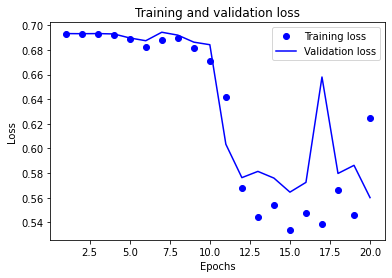

In [39]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

training, validation loss를 그려보면 몇 epoch까지의 training이 적절한지 최저점을 추정해볼 수 있음. <br/>
validation loss의 그래프가 train loss와의 이격이 발생하게 되면 더 이상의 트레이닝은 무의미해짐 <br/> <br/>
마찬가지로 training, validation accuracy도 그릴 수 있다.

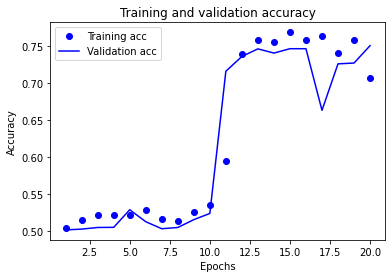

In [40]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 3-3. Word2Vec의 적용

### 🧤 Word Embedding(워드 임베딩)
: 라벨링 비용이 많이 드는 머신러닝 기반 감성분석의 비용을 절감하면서 정확도를 크게 향상시킬 수 있는 자연어처림 기법. 단어의 특성을 저차원 벡터값으로 표현 <br/><br/>
- 우리가 사용한 model의 첫 번째 레이어는 Embedding이었다.
    - 우리가 가진 사전 단어 개수 x 워드 벡터 사이즈 만큼의 크기를 가진 학습 파라미터
- 만약 우리의 감성 분류 모델이 잘 학습되었다면, Embedding 레이어에 학습된 우리 워드 벡터들도 의미 공간상에 유의미한 형태로 학습되었을 것.

워드 벡터 파일 저장할 디렉터리 생성 / 워드 벡터 다루는데 유용한 gensim 패키지 버전 확인

In [ ]:
# $ mkdir -p ~/aiffel/sentiment_classification/data
# $ pip list | grep gensim

In [42]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [45]:
# 학습한 Embedding 파라미터를 파일에 써서 저장하기
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개 제외)만큼의 워드 벡터를 파일에 기록
vectors = model.get_weights()[0]
for i in range(4, vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))

f.close()

gensim에서 제공하는 패키지를 이용해, 위에 남긴 임베딩 파라미터를 읽어 word vector로 활용할 수 있다.

In [46]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['computer']
vector

array([-0.07004449, -0.02276015, -0.01092113,  0.02760958,  0.0937071 ,
        0.06728878,  0.04471613,  0.06295116, -0.01648565,  0.01591614,
        0.07089996,  0.08711816, -0.08221798,  0.02190745, -0.03471297,
       -0.0396376 ], dtype=float32)

#### 단어 하나를 주고, 그와 가장 유사한 단어와 그 유사도를 확인하는 방법

In [47]:
word_vectors.similar_by_word("love")

[('fall', 0.956499457359314),
 ('sugar', 0.9305201172828674),
 ('shred', 0.9237475991249084),
 ('alter', 0.9233120083808899),
 ('smallest', 0.9223585724830627),
 ('gruesome', 0.9203730225563049),
 ('places', 0.9181022644042969),
 ('able', 0.9174290299415588),
 ('desired', 0.9169878363609314),
 ('into', 0.9164078235626221)]

love라는 단어와 유사한 단어를 그리 잘 찾았다 생각 들지 않는다. 감성 분류 태스크를 잠깐 학습한 것만으로 워드 벡터가 유의미하게 학습되기는 어려운 것 같다. <br/><br/>
이번엔 구글에서 제공하는 **`Word2Vec`**라는 사전학습된(Pretrained) 워드 임베딩 모델 가져다 활용해보자.
### 🧤 Word2Vec
- 1억 개의 단어로 구성된 Google News dataset을 바탕으로 학습됨
- 총 300만 개의 단어를 각각 300차원의 벡터로 표현함
- Embedding Layer과 원리는 동일

In [ ]:
# ln -s ~/data/GoogleNews-vectors-negative300.bin.gz ~/aiffel/sentiment_classification/data

`KeyedVectors.load_word2vec_format` 메서드로 워드 벡터를 로딩할 때 가장 많이 사용되는 상위 100만 개만 limit으로 조건을 주어 로딩함
- 메모리가 충분하다면 limit=None으로 300만 개 모두 로딩해!

In [49]:
from gensim.models import KeyedVectors

word2vec_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/GoogleNews-vectors-negative300.bin.gz'
word2vec = KeyedVectors.load_word2vec_format(word2vec_path, binary=True, limit=1000000)
vector = word2vec['computer']
# vector # 무려 300dim의 워드 벡터

In [50]:
# 메모리 다소 많이 소비하는 작업
word2vec.similar_by_word("love")

[('loved', 0.6907791495323181),
 ('adore', 0.6816873550415039),
 ('loves', 0.661863386631012),
 ('passion', 0.6100708842277527),
 ('hate', 0.600395679473877),
 ('loving', 0.5886635780334473),
 ('affection', 0.5664337873458862),
 ('undying_love', 0.5547304749488831),
 ('absolutely_adore', 0.5536840558052063),
 ('adores', 0.5440906882286072)]

Word2Vec에서 제공하는 워드 임베딩 벡터들끼리는 의미적 유사도가 가까운 것이 서로 가깝게 제대로 학습된 것을 확인 가능함 <br/>
이전 스텝에서 학습했던 모델의 임베딩 레이어를 Word2Vec의 것으로 교체하여 다시 학습시켜보자

In [51]:
vocab_size = 10000 # 어휘 사전의 크기 (10,000개의 단어)
word_vector_dim = 300 # 워드 벡터의 차원 수
embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드 벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(4, vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

In [53]:
from tensorflow.keras.initializers import Constant

vocab_size = 10000 # 어휘 사전의 크기 (10,000개의 단어)
word_vector_dim = 300 # 워드 벡터의 차원 수

# 모델 구성
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size,
                                    word_vector_dim,
                                    embeddings_initializer=Constant(embedding_matrix), # 카피한 임베딩을 여기서 활용
                                    input_length=maxlen,
                                    trainable=True)) # trainable을 True로 주면 Fine-tuing
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 580, 300)          3000000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 574, 16)           33616     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 114, 16)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 108, 16)           1808      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [54]:
# 학습의 진행
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

epochs=20 # 훈련하며 바꿔보기

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 5s 86ms/step - loss: 0.6942 - accuracy: 0.5357 - val_loss: 0.6715 - val_accuracy: 0.5876
Epoch 2/20
30/30 [==============================] - 2s 68ms/step - loss: 0.6436 - accuracy: 0.6370 - val_loss: 0.6089 - val_accuracy: 0.6934
Epoch 3/20
30/30 [==============================] - 2s 68ms/step - loss: 0.5352 - accuracy: 0.7593 - val_loss: 0.4650 - val_accuracy: 0.8145
Epoch 4/20
30/30 [==============================] - 2s 69ms/step - loss: 0.3582 - accuracy: 0.8610 - val_loss: 0.3536 - val_accuracy: 0.8471
Epoch 5/20
30/30 [==============================] - 2s 69ms/step - loss: 0.2509 - accuracy: 0.9025 - val_loss: 0.2982 - val_accuracy: 0.8745
Epoch 6/20
30/30 [==============================] - 2s 69ms/step - loss: 0.1874 - accuracy: 0.9322 - val_loss: 0.2916 - val_accuracy: 0.8801
Epoch 7/20
30/30 [==============================] - 2s 69ms/step - loss: 0.1357 - accuracy: 0.9587 - val_loss: 0.3084 - val_accuracy: 0.8717
Epoch 8/20
30

In [55]:
# 테스트셋을 통한 모델 평가
results = model.evaluate(x_test, y_test, verbose
print(results)

782/782 - 5s - loss: 0.4827 - accuracy: 0.8701
[0.48273608088493347, 0.8701199889183044]


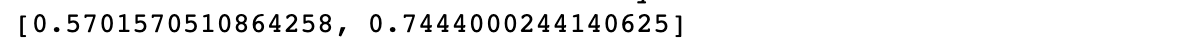
이 전과 비교했을 때 성능향상이 잘 일어났다.